Notebook to get and clean the data of Irish News about covid-19 vaccination

In [11]:
from helpers import *

In [2]:
#Install Driver
# Versión Chrome 89.0.4389.114 (Build oficial) (64 bits)
driver = webdriver.Chrome(ChromeDriverManager().install())



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST driver version for 96.0.4664
Get LATEST driver version for 96.0.4664
Trying to download new driver from https://chromedriver.storage.googleapis.com/96.0.4664.45/chromedriver_linux64.zip
Driver has been saved in cache [/home/david/.wdm/drivers/chromedriver/linux64/96.0.4664.45]


In [4]:
search_URL='https://www.irishnews.com/coronavirus/list/page/1'

In [15]:
# There are 134pages of Covid: 
list_search_url =[]
list_search_url.append("https://www.irishnews.com/coronavirus/list/page/1" )
for i in range(2, 135):
    list_search_url.append(f"https://www.irishnews.com/coronavirus/list/page/{i}")

In [19]:
list_links=[]
for i in list_search_url: 
    driver.get(i)
    links = driver.find_elements_by_xpath('//h1/a')
    for j in links: 
        list_links.append(j.get_attribute('href'))

In [20]:
len(list_links)

2680

In [23]:
with open("list_links_irish_news.txt", 'w') as f:
    for s in list_links:
        f.write(str(s) + '\n')

In [24]:
with open("list_links_irish_news.txt", 'r') as f:
    list_links_irish = [line.rstrip('\n') for line in f]
    

In [29]:
list_links_irish=list(set(list_links_irish))
len(list_links_irish)

2672

In [31]:
def get_html_la_liberte(list_links):
    #Count
    extracted_articles=0 
    for i in list_links: 
        driver.get(i)
        html = driver.page_source
        tail=i.split('/')[-2]
        extracted_articles += 1
        with open(f'/home/david/Escritorio/VACTINATION_PROJECT/HTMLs/IRISH_NEWS/{tail}.txt', 'w') as f: 
            f.write(html)
        print(f'Extracted articles: {extracted_articles} of {len(list_links)}',end='\r')
        time.sleep(1)

In [35]:
# get_html_la_liberte(list_links_irish)

In [34]:
get_html_la_liberte(list_links_irish[150:])

In [12]:
import os
list_articles_irish=[]
for filename in os.listdir("/home/david/Escritorio/VACCINATION_PROJECT/HTMLs/IRISH_NEWS/"):
    with open(os.path.join("/home/david/Escritorio/VACCINATION_PROJECT/HTMLs/IRISH_NEWS/", filename), 'r') as f:
        html_file = f.read()
    list_text=[]
    soup = BeautifulSoup(html_file, 'html.parser')
    try:
        title=soup.find("h1", class_="lancio-title").text.strip()
    except: 
        title="error"
    try:
        author=soup.find("span", class_="lancio-authorname").text.strip()
    except: 
        author = "error"
    try:
        link=soup.find("meta", property="og:url")['content']
    except: 
        link="error"
    try:
        subheadline = soup.find("h2").text.strip()
    except: 
        subheadline="error"
    try:
        date= soup.find(class_='lancio-datetime-string').text.strip()
    except: 
        date="error"
    try:
        tweets = soup.find_all(attrs={"dir" : "ltr"})
        for tweet in tweets:
            tweet.decompose()
    except: 
        pass
    try:
        tf = soup.find("div",class_="lancio-text").find_all("p")
        for p in tf:
            list_text.append(p.get_text().strip())
        text=' '.join(list_text)
    except: 
        text= "error"
    list_articles_irish.append({'Title': title, 
                          'Subheadline':subheadline,
                          'Text':text,
                          'Authors': author, 
                          'Date': date,
                          'Link':link}) 


In [13]:
articles_irish = pd.DataFrame.from_dict(list_articles_irish)

In [14]:
articles_irish

,Title,Subheadline,Text,Authors,Date,Link
0,"India sets global record of 314,000 new corona...",Topics,India has reported a global record of more tha...,"Ashok Sharma, Associated Press","22 April, 2021 07:08",http://www.irishnews.com/news/worldnews/2021/0...
1,Northern Ireland's weekly Covid death toll dro...,Topics,Northern Ireland’s weekly Covid-19 death toll ...,"Rebecca Black, PA","23 April, 2021 09:57",http://www.irishnews.com/news/northernirelandn...
2,Taoiseach calls on health experts to reconside...,Topics,The AstraZeneca and Johnson & Johnson vaccines...,"James Ward, PA","25 June, 2021 10:21",http://www.irishnews.com/news/republicofirelan...
3,'No resolution' with Dublin government over sh...,Topics,No resolution has been reached between Stormon...,"Rebecca Black, PA","18 January, 2021 14:31",http://www.irishnews.com/news/northernirelandn...
4,Most of South Korean warship's crew have coron...,Topics,The number of infected sailors on a South Kore...,AP Reporters,"19 July, 2021 07:59",http://www.irishnews.com/news/worldnews/2021/0...
...,...,...,...,...,...,...
2667,Irish government accused of failing to prepare...,Topics,Mary Lou McDonald accused the Government of be...,"Dominic McGrath, PA","23 November, 2021 14:47",https://www.irishnews.com/news/republicofirela...
2668,Northern Ireland Executive agrees £25 million ...,Topics,THE Executive yesterday agreed new funding pac...,Marie Louise McConville,"26 February, 2021 01:00",http://www.irishnews.com/news/northernirelandn...
2669,Angela Merkel urges German politicians to pass...,Topics,German Chancellor Angela Merkel urged parliame...,"David Rising, Associated Press","16 April, 2021 11:27",http://www.irishnews.com/news/worldnews/2021/0...
2670,Coronavirus: 14 further deaths and 433 new cases,Topics,There were 14 further Coronavirus deaths recor...,error,"24 January, 2021 14:02",http://www.irishnews.com/news/northernirelandn...


# CLEAN ARTICLES

In [15]:
# Clean function in order to eliminate characters like \n or \n\n after scraping
def preprocessor(text):
#     text = str(text).lower()
    
#     text = re.sub('https?://\S+|www\.\S+', '', text)
#     text = re.sub('<.*?>+', '', text)
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n\n', '', text)
    text = re.sub('\'','', text)
    text = re.sub('\n', '', text)
    text = re.sub('\xad', '', text)
    text = re.sub('\xa0', '', text)
    text = re.sub('\u2009', '', text)
    
#     text = re.sub('\w*\d\w*', '', text)
    return text

In [16]:
articles_irish['Text']=articles_irish['Text'].apply(preprocessor)
articles_irish['n_words'] = articles_irish.Text.apply(lambda x: len(str(x).split(' ')))
articles_irish['Newspaper']= 'THE IRISH NEWS'
articles_irish['Country']= 'United Kingdom'

In [17]:
articles_irish=articles_irish[articles_irish.Text.str.contains("vacc|Vacc")|articles_irish.Subheadline.str.contains("vacc|Vacc")|articles_irish.Title.str.contains("vacc|Vacc")]

In [18]:
#Date
# 2 special cases
articles_irish.Date[2209]=articles_irish.Date[2209].split(': ')[1]
articles_irish.Date[417]=articles_irish.Date[417].split(': ')[1]
for index,row in articles_irish.iterrows(): 
    try:
        articles_irish['Date'][index] =dateparser.parse(row.Date).date()
    except: 
        continue
articles_irish['Date'] = pd.to_datetime(articles_irish['Date'])

/tmp/ipykernel_35593/2647301745.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_irish.Date[2209]=articles_irish.Date[2209].split(': ')[1]
/tmp/ipykernel_35593/2647301745.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_irish.Date[417]=articles_irish.Date[417].split(': ')[1]
/home/david/anaconda3/lib/python3.9/site-packages/dateparser/date_parser.py:35: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest

In [19]:
articles_irish.sort_values('Date')

,Title,Subheadline,Text,Authors,Date,Link,n_words,Newspaper,Country
2113,Reasons why the Covid-19 pandemic will not be ...,Topics,The start of a Covid-19 vaccination programme ...,"Tom Pilgrim, PA",2020-12-08,http://www.irishnews.com/news/uknews/2020/12/0...,885,THE IRISH NEWS,United Kingdom
1801,Senior nurse Joanna Sloan is first to receive ...,Topics,A SENIOR nurse has become the first person in ...,Seanín Graham,2020-12-08,http://www.irishnews.com/news/northernirelandn...,752,THE IRISH NEWS,United Kingdom
593,Arlene Foster does not foresee new Covid-19 re...,Topics,First Minister Arlene Foster has said she does...,error,2020-12-08,http://www.irishnews.com/news/northernirelandn...,328,THE IRISH NEWS,United Kingdom
590,Michelle O'Neill warns new Covid-19 restrictio...,Topics,Michelle ONeill has refused to rule out imposi...,"Michael McHugh, PA",2020-12-08,http://www.irishnews.com/news/northernirelandn...,283,THE IRISH NEWS,United Kingdom
417,First to receive jab in Northern Ireland lauds...,Topics,The first person to receive the Covid-19 vacci...,"Michael McHugh and David Young, PA",2020-12-08,http://www.irishnews.com/news/northernirelandn...,382,THE IRISH NEWS,United Kingdom
...,...,...,...,...,...,...,...,...,...
1639,Top surgeon tells MLAs: Health service faces ‘...,Topics,Northern Ireland’s health service is facing pr...,"Jonathan McCambridge, PA",2021-11-30,https://www.irishnews.com/news/northernireland...,541,THE IRISH NEWS,United Kingdom
52,Group behind anti-vaccine passport ads in Belf...,Topics,A GROUP behind anti-vaccine passport adverts i...,Paul Ainsworth,2021-11-30,https://www.irishnews.com/news/northernireland...,314,THE IRISH NEWS,United Kingdom
637,Nations close borders as more Omicron cases em...,Topics,Dutch health authorities have announced they h...,AP Reporters,2021-11-30,https://www.irishnews.com/news/worldnews/2021/...,539,THE IRISH NEWS,United Kingdom
265,"Covid-19: Two more deaths as 1,585 new cases c...",Topics,Another two people have died after contracting...,Digital Staff,2021-11-30,https://www.irishnews.com/news/northernireland...,186,THE IRISH NEWS,United Kingdom


In [20]:
articles_irish.to_csv(r'/home/david/Escritorio/VACCINATION_PROJECT/DF_HTML_VERSION/articles_irish_01_12.csv',index = False)

In [ ]:
**************************************

In [36]:
df=pd.read_csv('/home/david/Escritorio/VACCINATION_PROJECT/DF_HTML_VERSION/articles_irish_01_12.csv')

In [37]:
df.sort_values('Date')

,Title,Subheadline,Text,Authors,Date,Link,n_words,Newspaper,Country
101,"Face masks may be needed next winter, warns Br...",Topics,"Do not ditch the face masks just yet, the Brit...","Tess de la Mare, PA",2020-12-08,http://www.irishnews.com/news/uknews/2020/12/0...,591,THE IRISH NEWS,United Kingdom
357,Arlene Foster does not foresee new Covid-19 re...,Topics,First Minister Arlene Foster has said she does...,error,2020-12-08,http://www.irishnews.com/news/northernirelandn...,328,THE IRISH NEWS,United Kingdom
255,First to receive jab in Northern Ireland lauds...,Topics,The first person to receive the Covid-19 vacci...,"Michael McHugh and David Young, PA",2020-12-08,http://www.irishnews.com/news/northernirelandn...,414,THE IRISH NEWS,United Kingdom
1058,Senior nurse Joanna Sloan is first to receive ...,Topics,A SENIOR nurse has become the first person in ...,Seanín Graham,2020-12-08,http://www.irishnews.com/news/northernirelandn...,809,THE IRISH NEWS,United Kingdom
295,Enniskillen grandmother Margaret Keenan (90) r...,Topics,The NHS has become the first health service in...,"Jane Kirby and Richard Vernalls, PA",2020-12-08,http://www.irishnews.com/news/northernirelandn...,853,THE IRISH NEWS,United Kingdom
...,...,...,...,...,...,...,...,...,...
1501,Covid vaccination clinics to offer boosters to...,Topics,New vaccination clinics across Northern Irelan...,"Jonathan McCambridge, PA",2021-11-30,https://www.irishnews.com/news/northernireland...,632,THE IRISH NEWS,United Kingdom
40,Group behind anti-vaccine passport ads in Belf...,Topics,A GROUP behind anti-vaccine passport adverts i...,Paul Ainsworth,2021-11-30,https://www.irishnews.com/news/northernireland...,314,THE IRISH NEWS,United Kingdom
972,Top surgeon tells MLAs: Health service faces ‘...,Topics,Northern Ireland’s health service is facing pr...,"Jonathan McCambridge, PA",2021-11-30,https://www.irishnews.com/news/northernireland...,541,THE IRISH NEWS,United Kingdom
383,Nations close borders as more Omicron cases em...,Topics,Dutch health authorities have announced they h...,AP Reporters,2021-11-30,https://www.irishnews.com/news/worldnews/2021/...,539,THE IRISH NEWS,United Kingdom


In [5]:
df.Link[583]

'https://www.irishnews.com/news/northernirelandnews/2021/11/30/news/top-surgeon-tells-mlas-health-service-faces-never-before-seen-pressures-2523410/'

### NER

In [134]:
df_ner= ner(df.Text,"en_core_web_sm")

In [135]:
df_ner=df_ner.groupby(['Entity','Label']).size().reset_index(name='Frequency')

In [136]:
df_ner.Label.unique()

array(['WORK_OF_ART', 'ORG', 'CARDINAL', 'MONEY', 'PERSON', 'ORDINAL',
       'DATE', 'PERCENT', 'QUANTITY', 'TIME', 'PRODUCT', 'FAC', 'GPE',
       'LOC', 'NORP', 'LAW', 'EVENT', 'LANGUAGE'], dtype=object)

Text(0.5, 1.0, 'Most frequent NE PERSON')

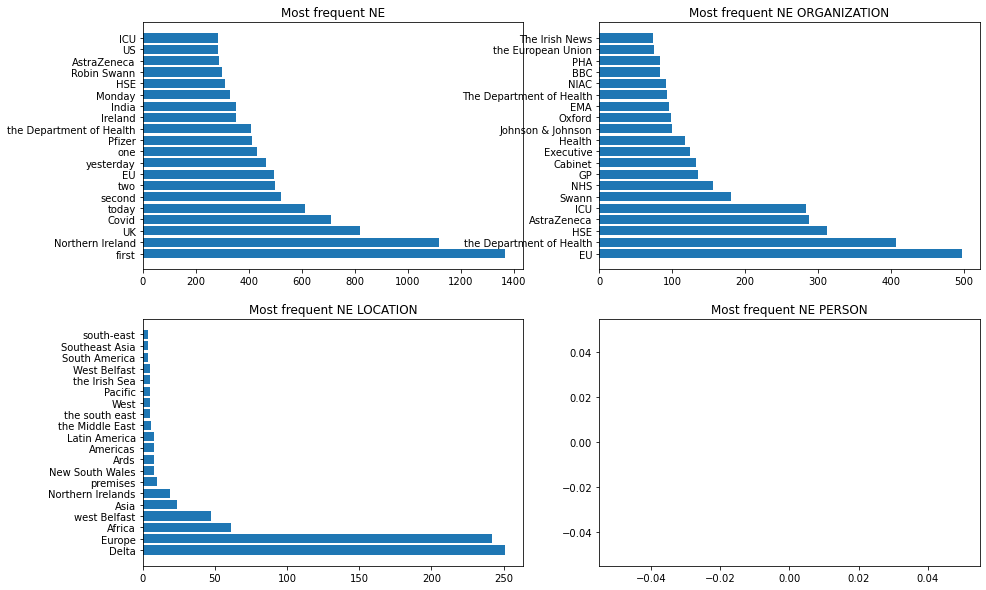

In [137]:
fig, axs = plt.subplots(2, 2,figsize=(15,10))
axs[0, 0].barh(y=df_ner.sort_values('Frequency',ascending=False).head(20)['Entity'],width=df_ner.sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[0,0].set_title('Most frequent NE')
axs[0, 1].barh(y=df_ner[df_ner['Label']=="ORG"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="ORG"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[0,1].set_title('Most frequent NE ORGANIZATION')
axs[1, 0].barh(y=df_ner[df_ner['Label']=="LOC"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="LOC"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[1,0].set_title('Most frequent NE LOCATION')
axs[1, 1].barh(y=df_ner[df_ner['Label']=="PER"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="PER"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[1,1].set_title('Most frequent NE PERSON')